# CNN AlexNet #
## Try replace tanh with relu #
## ** CNN example: ** ##
 
* 1- Block 1: Conv2D + MaxPooling2D + Natch Normalization
    * Conv2D: 96 filters, 11 * 11 kernel, Relu activation,  224 * 224 * 3 pixels, strides (4, 4)
        * output: ((224 - 11) / 4 + 1) * 96  = 54  * 96
    * MaxPooling2D: pool (3, 3), strides (2, 2)
        * output: (((54 -3) / 2) + 1) * 96 = 26 * 96
    * BatchNormalization

* 2- Block 2: Conv2D + MaxPooling2D + Natch Normalization
    * Conv2D: 256 filters, 5 * 5 kernel, Relu activation 
    * MaxPooling2D: pool (3, 3), strides (2, 2)
    * BatchNormalization

* 3- Block 3: 3 Conv2D + maxPooling + BatchNormalization
    * Conv2D: 256 filters, 3 * 3 kernel, Relu activation 
    * Conv2D: 384 filters, 3 * 3 kernel, Relu activation 
    * Conv2D: 384 filters, 3 * 3 kernel, Relu activation 
    * MaxPooling2D: pool (3, 3), strides (2, 2)
    * BatchNormalization

* 4- Flatten layer

* 5- One dense Block 
    * Dense 4096, tanh activation
    * Dropout: 0.5
    * Dense 4096, tanh activation
    * Dropout: 0.5

* 6- One output layer, 17 units, Softmax
    Output: 17 probabilties
  

## Results 50 epochs:## 
* Epoch 49/50 1020/1020 [==============================] - 30s 29ms/sample - loss: 0.2544 - accuracy: 0.9402 - val_loss: 4.4543 - val_accuracy: 0.6324
* Epoch 50/50
1020/1020 [==============================] - 30s 30ms/sample - loss: 0.1877 - accuracy: 0.9559 - val_loss: 8.2246 - val_accuracy: 0.4529

## Results 100 epochs:## 


## References: ##
* https://www.kaggle.com/saidakbarp/17-flower-categories-cnn
* https://www.youtube.com/watch?v=AgkfIQ4IGaM&feature=youtu.be
* https://www.learnopencv.com/understanding-alexnet/

## Image ##
* See image file:  AlexNet-1.png

Import packages

In [369]:
#numpy: Numeric library
import numpy as np 
#graphics
from matplotlib import pyplot as plt

#tensorflow: use some TF tools
import tensorflow as tf
#Keras: Deep learning API. In TF 2.x, it is included in TF
from tensorflow import keras
#Import Dense layer
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras import Model
#Optimizers: SGD (Stochastic Gradien Descent)
#from tensorflow.keras.optimizers import SGD as sgd

#import data set MNIST
from tensorflow.keras.datasets import mnist

#Batch Norm
from tensorflow.keras.layers import BatchNormalization

# import regularizer
from tensorflow.keras import regularizers  

#Dropout
from tensorflow.keras.layers import Dropout

#CNN 
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation


import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # for file editing
import shutil # for console commands

## Import  Flower data set ##
* Import Flower set
* Training: 
    
* Validation: 

In [370]:
#load images as np arrays
from PIL import Image #show one example of image
def load_data(fpath):    
    img=Image.open(fpath).resize((224,224)) # resize to 224x224 for training purposes
    img = np.asarray(img, dtype='float32')
    return img

In [382]:
#all images are loaded as np arrays

images=[]
labels=[]
total=1361
j=1
for i in range(1, total): 
    fname="./17category-flowers-py/jpg/image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
    images.append(load_data(fpath))
    labels.append(j) #labels are created as well
    if i%80==0: j+=1

In [388]:
print(min(labels), max(labels))

1 17


In [389]:
images = np.asarray(images) # all of the images are converted to np array of (1360,224,224,3)
labels = np.asarray(labels).reshape(1360,) # labels are also converted to (1360,1)

In [390]:
print(images.shape)
print(labels.shape)

(1360, 224, 224, 3)
(1360,)


## Split data into raining/Validation ##
* Install scikit-learn : conda install scikit-learn


In [401]:
# Use sklearn to split: 75-25 
# split data into training and test
from sklearn.model_selection import train_test_split 
x_train, x_valid, y_train, y_valid = train_test_split(images, labels, train_size = 0.80, random_state =  104)

In [402]:
print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

(1088, 224, 224, 3)
(1088,)
(272, 224, 224, 3)
(272,)


## To categorical ##

In [403]:
y_train = keras.utils.to_categorical(y_train - 1, None)
y_valid = keras.utils.to_categorical(y_valid - 1, None)

# Class number (17)
n_classes = y_train[0].size
print(n_classes)
 

17


In [404]:
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


Define Neural Network Architecture
Using Keras API

In [405]:
#Define activations
relu = keras.activations.relu
softmax = keras.activations.softmax
tanh = keras.activations.tanh

#define loss function: Cross entropy
loss = keras.losses.categorical_crossentropy
 

#define optimizer
sgd=keras.optimizers.SGD(lr=0.1)
adam=keras.optimizers.Adam
tf.print(adam)


<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>


In [406]:
# Sequential: model of type sequential (layer n can pass information only to layer n+1)
model = Sequential()
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_15", "layers": []}, "keras_version": "2.2.4-tf", "backend": "tensorflow"}'

In [407]:
#define First Convolutional / Pool block
nbFilters = 96  
kernel_size = (11, 11)
input_shape=(224,224,3)

model.add(Conv2D(nbFilters,   kernel_size=kernel_size,  strides=(4, 4), activation=relu, input_shape=input_shape))  

# Pooling layer
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

# batch Normalization
model.add(BatchNormalization())


In [408]:
#define second Convolutional / Pool block
nbFilters = 256  
kernel_size = (5, 5)

model.add(Conv2D(nbFilters, kernel_size=kernel_size, activation=relu)) #Convolutional

# Pooling layer
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

# batch Normalization
model.add(BatchNormalization())


In [409]:
#define third Convolutional / Pool block
nbFilters = 256  
kernel_size = (3, 3)

model.add(Conv2D(nbFilters,  kernel_size=kernel_size, activation=relu))
nbFilters = 384
model.add(Conv2D(nbFilters,  kernel_size=kernel_size, activation=relu))
model.add(Conv2D(nbFilters,  kernel_size=kernel_size, activation=relu))

# Pooling layer
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

# batch Normalization
model.add(BatchNormalization())

In [410]:
#Add dense layer
# Important : Flatten the output so as to add a dense layer
# Dense layer must have a flattened inpit (vector of scalars)
model.add(Flatten())

model.add(Dense(4096, activation=tanh))

model.add(Dropout(0.5)) #Dropout 50%

model.add(Dense(4096, activation=tanh))

model.add(Dropout(0.5)) #Dropout 50%


In [411]:
#Add outputLayer

model.add(Dense(n_classes, activation=softmax))

In [412]:
#compile Model
model.compile(loss=loss, 
         optimizer='adam',
         metrics=['accuracy'])

In [413]:
# print model summary
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 26, 26, 96)        384       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 10, 10, 256)       0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 10, 10, 256)       1024      
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 8, 8, 256)       

TensorBoard

In [414]:
from tensorflow.keras.callbacks import TensorBoard
import os 
import datetime
folder="logs/AlexNet"
if not os.path.exists(folder):
   os.mkdir(folder)
log_dir = folder + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print(log_dir)
os.mkdir(log_dir)
 
tensorBoard = TensorBoard(log_dir, histogram_freq=1,profile_batch = 100000000)

logs/AlexNet/20200316-201218


In [415]:
# Train
batch_size = 128
nb_epoch = 100
history=model.fit(x_train, y_train, batch_size= batch_size, epochs = nb_epoch, verbose=1, validation_data=(x_valid, y_valid) ,callbacks=[tensorBoard])

Train on 1088 samples, validate on 272 samples
Epoch 1/100
1088/1088 [==============================] - 38s 35ms/sample - loss: 5.0126 - accuracy: 0.2022 - val_loss: 8.7278 - val_accuracy: 0.0846
Epoch 2/100
1088/1088 [==============================] - 33s 31ms/sample - loss: 3.4549 - accuracy: 0.2601 - val_loss: 5.2570 - val_accuracy: 0.0772
Epoch 3/100
1088/1088 [==============================] - 33s 30ms/sample - loss: 2.6361 - accuracy: 0.3033 - val_loss: 5.6703 - val_accuracy: 0.0772
Epoch 4/100
1088/1088 [==============================] - 34s 31ms/sample - loss: 2.0982 - accuracy: 0.3713 - val_loss: 4.1255 - val_accuracy: 0.0809
Epoch 5/100
1088/1088 [==============================] - 34s 31ms/sample - loss: 1.8879 - accuracy: 0.4219 - val_loss: 5.6853 - val_accuracy: 0.0882
Epoch 6/100
 384/1088 [=========>....................] - ETA: 18s - loss: 1.9505 - accuracy: 0.4219

Save Model

In [365]:
# serialize model to JSON
print(log_dir)
model_json = model.to_json()
with open(log_dir + "/model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save(log_dir + "/model_all.h5")

logs/AlexNet/20200316-091039


Plot History

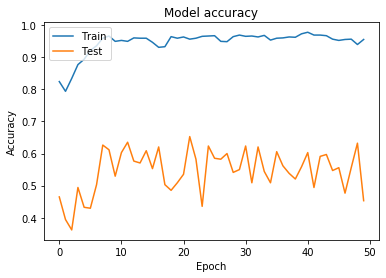

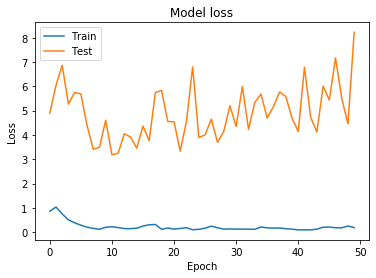

In [366]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [367]:
# summary
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 26, 26, 96)        384       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 10, 10, 256)       0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 10, 10, 256)       1024      
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 8, 8, 256)       

In [368]:
json = model.to_json()
tf.print(json)

{"class_name": "Sequential", "config": {"name": "sequential_14", "layers": [{"class_name": "Conv2D", "config": {"name": "conv2d_60", "trainable": true, "batch_input_shape": [null, 224, 224, 3], "dtype": "float32", "filters": 96, "kernel_size": [11, 11], "strides": [4, 4], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_37", "trainable": true, "dtype": "float32", "pool_size": [3, 3], "padding": "valid", "strides": [2, 2], "data_format": "channels_last"}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization_37", "trainable": true, "dtype": "float32", "axis": 

End